##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
!pip install openpyxl==3.0.9

##Dataframe creation

In [ ]:
df = pd.read_excel('Data Science In Action Unified Survey (Risposte).xlsx')
df

,Informazioni cronologiche,How would you describe your gender?,"How would you describe yourself? (please, give three words separate by a comma)",Do you know how to use a washing machine?,How often do you clean your bedroom?,Which animals do you like the most?,Which sport do you practice?,How many master's exams have you already passed?,How old are you?,Do you have a scholarship?,"Do you practice any sport activity? If yes, how many times a week?",Provide a brief feedback on the first semester of the course,"After graduating, do you plan to work or to continue with your studies?",Where did you graduate?,Do you know how to dance?,Which is the first semester's course you found most difficult?,"After your graduation, do you plan to stay in Italy or go abroad?",Were you taught the basics of programming during your bachelor's?,Will you apply for an Erasmus program?,What is the main reason you choose the master's degree?,Have you got insomnia problems?,How many days you think you are able to stay without the smartphone?,How do you think COVID19 has affected your social life?,Have you ever realized to use your smartphone for too many hours?,"If you ever realized to use your smartphone for too many hours, how many of them?",How stressed do you feel on a scale from 1 (no stressed) to 5 (highly stressed)?,Have you ever looked at your phone to find out something (eg. the time) but got distracted and looked at something else forgetting the reason why you had looked at the phone?,Have you ever thought about deleting your social account?,"If you ever though about deleting your social account, have you ever actually done?",How would you describe your dedication to your studies?,How many languages do you speak fluently?,Would you rather read a book or watch a movie?,Where do you see yourself in 2 years?,How many brothers or sisters do you have?,What is your zodiac sign?,How many books do you read every year on average?,Do you live with your family?,"How many hours on average do you spend using your phone in a day? (for a higher accuracy check the settings of your phone, please)",What is your main source of daily news?,To contact someone do you prefer a phone call or a text message?,...,CHOOSE YOUR KEYWORD ;) format: aaaaaa00 - nothing that will remind of you. SCREENSHOT THIS ONCE TYPED :) (eg. pizzamargherita26),"Have you ever had a job? If so, in what field?","After completing your master’s degree in data science, what are your future projects?.1",Do your parents smoke?,Are there smokers in your family?,"If you have sisters or brothers, do they smoke?","In your group of friends / people you hang out with, does the majority smoke?",Are you anxious?,"If you have a partner, does he/her smoke?",What's your favorite musical genre?,Describe your typical evening in three words,"Do you consider yourself a stressed person? Answer from 1 to 7 (1 minimum level, 7 maximum level)",What was the mean of your grades in your bachelor's degree?,Are you satisfied with how you manage your time during the day?,"How many streaming platforms do you use? (eg. Netflix, Disney Plus, Prime Video)",How many hours do you spend playing sports per day?,Which streaming platform do you prefer?,Are you satisfied with the offerings of the streaming platforms you subscribe to?,Do you prefer movies or tv series?,What kind of movies do you prefer?,What genre of TV series do you prefer?,How many hours do you spend a day watching movies and TV series?,How many hours do you spend studying per day?,Do you often rewatch movies or TV series that you have enjoyed or do you often seek out new titles?,Do you prefer to go to the movies or take advantage of streaming from home?,How many times do you go to the cinema in a month?,How many hours do you spend in hobbies per day?,What time of day do you use streaming platforms?,Do you watch TV series or movies while you eat?,Do you usually give a review to the movies/TV series you watch?,Do you feel that the movies/TV series recommended to you b

##Selecting the attributes needed 

In [ ]:
#Selecting the columns that seem to be more interesting for our purposes 
df1 = df.iloc[:,[1, 7, 8, 9, 12, 16, 18, 25, 29, 30, 32, 33, 36,40,48,54,55,56,57,60,74,77,83,84,86,92,110,126,136]]
#Renaming the columns to facilitate coding and  comprehension of the attributes 
df1 = df1.rename({'How would you describe your gender?': 'gender', "How many master's exams have you already passed?": 'exams_taken','How old are you?':'age','Do you have a scholarship?':'scholarship', 'After graduating, do you plan to work or to continue with your studies?':'future_plan','After your graduation, do you plan to stay in Italy or go abroad?':'leaving','Will you apply for an Erasmus program?':'Erasmus','How stressed do you feel on a scale from 1 (no stressed) to 5 (highly stressed)?':'levels_of_stress','How would you describe your dedication to your studies?':'study_dedication','How many languages do you speak fluently?':'number_of_languages','Where do you see yourself in 2 years?':'prevision_2_years_from_now','How many brothers or sisters do you have?':'n_siblings','Do you live with your family?': 'lives_with_family' ,'Are you currently in a relationship? (long distance or not)':'in_a_relationship','Do you consider yourself kind of bored?':'bored','Do you possess a car?':'has_a_car','What is the current mean of your grades?':'current_grades_mean', "What's your level of weekly alcohol assumption?":'weekly_level_of_alcohol', 'Do you prefer to study on your own or with some friends?':'studying_preferences','Where are you from? (specify country and city)':'origin','Can you manage private life and study?':'able_to_manage_life_and_study','Does the future scare you?':'scared_of_future','How many members are there in your family?':'family_members','What is your high school grade? Are you happy with it?':'high_school_grade','Do you feel happy?':'is_happy','In near future, would you rather to be an employee or an entrepreneur?':'wants_to_be','Have you had Erasmus experiences abroad? If so, where?':'has_had_Erasmus',"What was the mean of your grades in your bachelor's degree?":'bachelor_mean_grades','How many hours do you spend studying per day?':'hours_of_study_per_day'}, axis=1)  # new method
df1

,gender,exams_taken,age,scholarship,future_plan,leaving,Erasmus,levels_of_stress,study_dedication,number_of_languages,prevision_2_years_from_now,n_siblings,lives_with_family,in_a_relationship,bored,has_a_car,current_grades_mean,weekly_level_of_alcohol,studying_preferences,origin,able_to_manage_life_and_study,scared_of_future,family_members,high_school_grade,is_happy,wants_to_be,has_had_Erasmus,bachelor_mean_grades,hours_of_study_per_day
0,Male,3.0,23.0,Yes,Working,Going abroad,Yes,2.0,I speedrun tasks when time is over,2.0,With a job that satisfy me,1.0,No,No,Yes,Yes,26.0,1.0,On my own,"Italy, Rome",Yes,Yes,2.0,"96, yes",Yes,Employee,No,25.0,3.0
1,Female,4.0,22.0,No,Working,Staying in Italy,Yes,4.0,I just study whenever I feel guilty,2.0,With a job that satisfy me,2.0,No,No,Yes,Yes,27.0,2.0,On my own,"Italy, Naples",Yes,Yes,5.0,"95, yes",I don't know,I don't know,Germany,27.6,5.0
2,Male,3.0,23.0,No,Studying,Staying in Italy,No,2.0,I speedrun tasks when time is over,2.0,Still studying,1.0,No,Yes,No,Yes,24.0,1.0,On my own,"Italy, Sicily",Yes,Yes,4.0,80 yes it's good,Yes,Entrepreneur,No,22.0,4.0
3,Male,3.0,22.0,No,Working,Going abroad,Yes,5.0,I have a plan for everyday,3.0,Still studying,I am only child,Yes,No,No,No,27.0,2.0,With friends,"Italy, Naples",Yes,No,3.0,100? I can't understand this question,No,Entrepreneur,haven't,26.5,5.0
4,Male,4.0,22.0,No,Working,Staying in Italy,Yes,5.0,I have a plan for everyday,3.0,Looking for a job,2.0,Yes,No,Yes,Yes,29.0,1.0,With friends,Italy. Foggia,Yes,Yes,5.0,90. Could have done more,No,Entrepreneur,no,26.5,3.0
5,Female,3.0,21.0,No,Working,Going abroad,No,4.0,I speedrun tasks when time is over,1.0,Looking for a job,I am only child,Yes,No,No,Yes,30.0,4.0,With friends,"Italy, Rome",No,Yes,2.0,"85, yes",Yes,I don't know,no,27.0,5.0
6,Male,3.0,23.0,No,Working,Going abroad,Yes,3.0,I just study whenever I feel guilty,3.0,Looking for a job,1.0,No,Yes,No,Yes,28.5,2.0,On my own,"Italy, Lama Mocogno(MO)",No,Yes,4.0,"80, yes",I don't know,Entrepreneur,No,27.6,5.0
7,Female,3.0,21.0,No,Working,Going abroad,Yes,3.0,I speedrun tasks when time is over,2.0,Looking for a job,more than 2,Yes,Yes,Yes,Yes,27.0,2.0,On my own,"italy, rome",Yes,Yes,6.0,"84, yes",Yes,I don't know,no,26.0,5.0
8,Male,4.0,25.0,No,Studying,Staying in Italy,Yes,4.0,I speedrun tasks when time is over,2.0,With a job that satisfy me,2.0,Yes,No,No,No,29.5,2.0,With friends,"Florence, italy",Yes,Yes,5.0,66/100. Not happy but not judging myself on th...,I don't know,I don't know,"Yes, in Poland, Warsaw",27.5,5.0
9,Female,4.0,23.0,Yes,Working,Going abroad,Yes,3.0,I have a plan for everyday,2.0,With a job that satisfy me,1.0,Yes,No,No,No,29.0,2.0,On my own,"Italy, Naples",No,Yes,4.0,110 cum laude. Very :),Yes,Entrepreneur,Yes. Denmark.,28.0,5.0


##Data Visualization

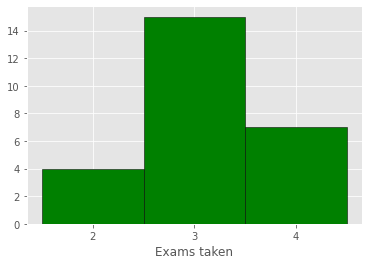

In [ ]:
#histogram of number of exams taken so far 
plt.style.use('ggplot')
bin_edges = np.arange(1.5, 5.5, 1)
plt.hist(df1.iloc[:,1], bins = bin_edges,edgecolor='black',color='green')
plt.xticks(np.arange(2, 4.5, 1))
plt.xlabel('Exams taken')
plt.show()

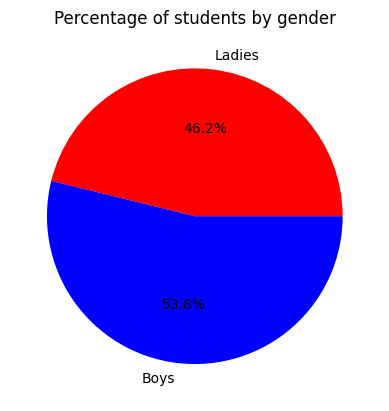

In [ ]:
#Pie chart representing the sex percentage of students 
plt.style.use('default')
Pgender=df1.groupby(by=["gender"]).size()
colors=['r','b']
plt.pie(Pgender,colors=colors,labels=['Ladies','Boys'],autopct='%1.1f%%', shadow=False)
plt.title('Percentage of students by gender')
plt.show()

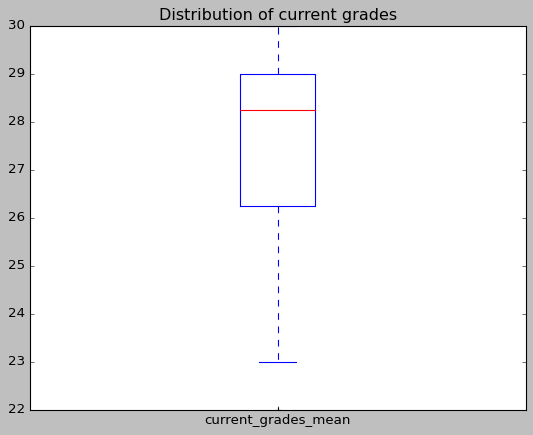

In [ ]:
#Distribution of the current grades of students 
plt.style.use('classic')
df1['current_grades_mean'].plot.box(title='Distribution of current grades')
#It appears that the distribution of grades is very skewed towards high grades (the data might be biased since only good performing students are the ones doing the bonus project )

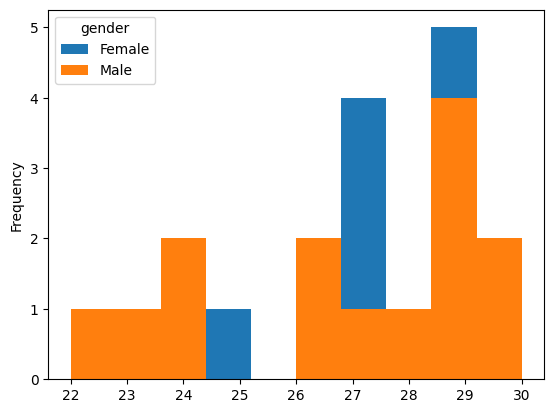

In [ ]:
#Distribution of grades by gender 
plt.style.use('default')
df1.pivot(columns='gender', values='current_grades_mean').plot.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__'

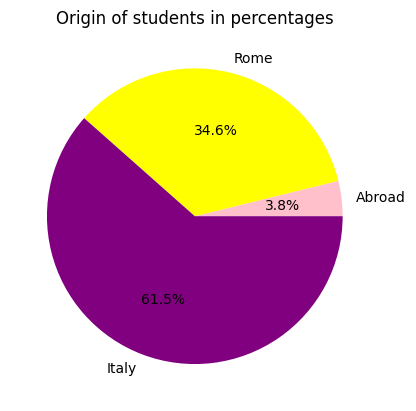

In [ ]:
#Fixing the instances in the 'origin' column since the format is not uniform
for el in range(0,len(df1['origin'])):
  df1['origin'][el]=df1['origin'][el].lower()
  if  'rome' in df1['origin'][el]:
    df1['origin'][el]='Rome'
  elif 'roma' in df1['origin'][el]:
    df1['origin'][el]='Rome'
  elif 'italy' in df1['origin'][el]:
    df1['origin'][el]='Italy'
  else:
    df1['origin'][el]='Abroad'

#piechart Origin
Origin=df1.groupby(by=["origin"]).size()
colors=['pink','yellow','purple']
labels=['Abroad','Rome','Italy']
plt.pie(Origin,colors=colors,labels=labels, autopct='%1.1f%%', shadow=False)
plt.title('Origin of students in percentages')
plt.show()

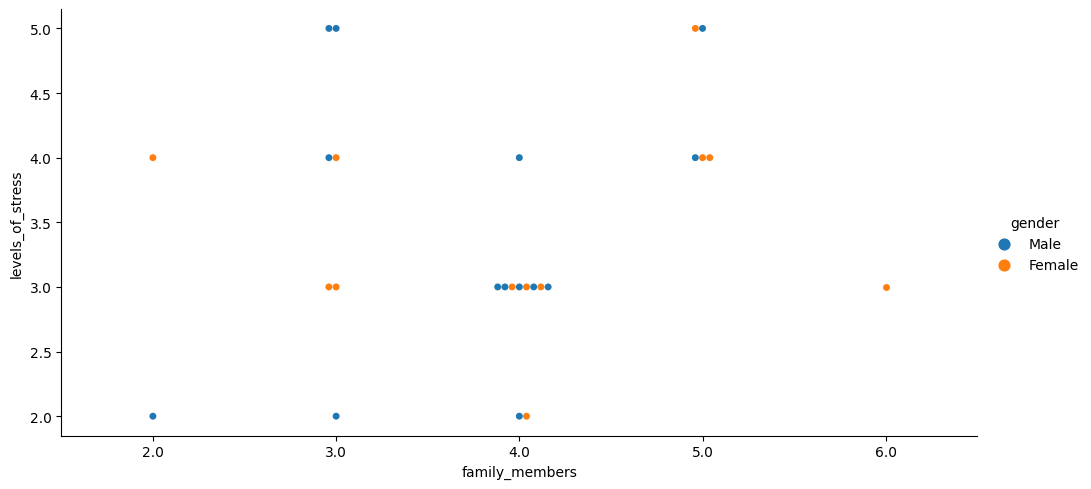

In [ ]:
#catplot of family members vs levels of stress by gender 
sns.catplot(x="family_members", y="levels_of_stress", hue="gender", aspect=2,
            kind="swarm", data=df1)

#students whose families are larger seem to be more inclined to stress out with respect to others

#Data Manipulation and Pre-processing

In [ ]:
#fixing has_had_Erasmus column 
for el in range(0,len(df1['has_had_Erasmus'])):
  df1['has_had_Erasmus'][el]=df1['has_had_Erasmus'][el].lower()
  if  'no' in df1['has_had_Erasmus'][el]:
    df1['has_had_Erasmus'][el]=0
  elif 'not' in df1['has_had_Erasmus'][el]:
    df1['has_had_Erasmus'][el]=0
  elif 'never'  in df1['has_had_Erasmus'][el]:
    df1['has_had_Erasmus'][el]=0
  elif "haven't" in df1['has_had_Erasmus'][el]:
    df1['has_had_Erasmus'][el]=0
  else:
    df1['has_had_Erasmus'][el]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/loc

In [ ]:
#changing the format of the instances of the 'high_school_grade' column 
df1['high_school_grade'] = df1['high_school_grade'].str.extract('(\d+)', expand=False)
noNull=df1['high_school_grade'].dropna()
l=[]
for el in noNull:
  el=int(el)
  l.append(el)
avg_grade=sum(l)/len(l)
avg_grade
##this is the value will use to substitute the null value. We cannot just delete the instance because the number of instances is ridiculous
df1['high_school_grade'].fillna(round(avg_grade,0), inplace=True)
df1['high_school_grade']

0       96
1       95
2       80
3      100
4       90
5       85
6       80
7       84
8       66
9      110
10      65
11      98
12     100
13      90
14      82
15      66
16      72
17      74
18      60
19      75
20     100
21      96
22    84.0
23      62
24      80
25      95
Name: high_school_grade, dtype: object

In [ ]:
#changing the format of the instances of the 'bachelor_mean_grades' column 
# Unfortunately our colleagues decided to play around and instead of typing the grade wrote stupid jokes so we had to fix some instances 
l2=[]
df1['bachelor_mean_grades'][15, 18] = 0 
l2=[]
for el in df1['bachelor_mean_grades']:
  if el != 0:
    el=float(el)
    l2.append(el)
l2
avg_mean=sum(l2)/len(l2)
avg_mean
##this is the value will use to substitute the null value. We cannot just delete the instance because the number of instances is ridiculous
df1['bachelor_mean_grades'][15, 18] = round(avg_mean,2)  
df1['bachelor_mean_grades']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      25.0
1      27.6
2      22.0
3      26.5
4      26.5
5      27.0
6      27.6
7      26.0
8      27.5
9      28.0
10     25.0
11    28.64
12     27.0
13     26.0
14     26.7
15     26.5
16    26.14
17     25.0
18     26.5
19     24.3
20     28.0
21     27.5
22     27.8
23     25.5
24     25.5
25    29.15
Name: bachelor_mean_grades, dtype: object

In [ ]:
#Preprocessing the data and transforming categorical columns with ordinal and one-hot encoding 
df1=df1.replace({"gender": {"Male":1, "Female":0},
                 "future_plan": {"Working":1, "Studying":0},
                 "leaving": {"Staying in Italy":1, "Going abroad":0},
                 "study_dedication": {"I speedrun tasks when time is over":1, "I just study whenever I feel guilty":2, "I have a plan for everyday":3},
                 "prevision_2_years_from_now": {"Still studying":1, "Looking for a job":2, "With a job that satisfy me":3},
                 "studying_preferences": {"On my own":1, "With friends":0},
                 "n_siblings": {"I am only child":0, "more than 2":3},
                 "is_happy": {"I don't know":2},
                 "wants_to_be": {"Employee":1, "I don't know":2, "Entrepreneur":3},
                 "number_of_languages": {"more than 3":4},
                 "origin": {"Rome":0, "Italy":1, "Abroad":2}})
df1.replace(('Yes', 'No'), (1, 0), inplace=True)
df1

,gender,exams_taken,age,scholarship,future_plan,leaving,Erasmus,levels_of_stress,study_dedication,number_of_languages,prevision_2_years_from_now,n_siblings,lives_with_family,in_a_relationship,bored,has_a_car,current_grades_mean,weekly_level_of_alcohol,studying_preferences,origin,able_to_manage_life_and_study,scared_of_future,family_members,high_school_grade,is_happy,wants_to_be,has_had_Erasmus,bachelor_mean_grades,hours_of_study_per_day
0,1,3.0,23.0,1,1,0,1,2.0,1,2.0,3,1.0,0,0,1,1,26.0,1.0,1,0,1,1,2.0,96,1,1,0,25.0,3.0
1,0,4.0,22.0,0,1,1,1,4.0,2,2.0,3,2.0,0,0,1,1,27.0,2.0,1,1,1,1,5.0,95,2,2,1,27.6,5.0
2,1,3.0,23.0,0,0,1,0,2.0,1,2.0,1,1.0,0,1,0,1,24.0,1.0,1,1,1,1,4.0,80,1,3,0,22.0,4.0
3,1,3.0,22.0,0,1,0,1,5.0,3,3.0,1,0.0,1,0,0,0,27.0,2.0,0,1,1,0,3.0,100,0,3,0,26.5,5.0
4,1,4.0,22.0,0,1,1,1,5.0,3,3.0,2,2.0,1,0,1,1,29.0,1.0,0,1,1,1,5.0,90,0,3,0,26.5,3.0
5,0,3.0,21.0,0,1,0,0,4.0,1,1.0,2,0.0,1,0,0,1,30.0,4.0,0,0,0,1,2.0,85,1,2,0,27.0,5.0
6,1,3.0,23.0,0,1,0,1,3.0,2,3.0,2,1.0,0,1,0,1,28.5,2.0,1,1,0,1,4.0,80,2,3,0,27.6,5.0
7,0,3.0,21.0,0,1,0,1,3.0,1,2.0,2,3.0,1,1,1,1,27.0,2.0,1,0,1,1,6.0,84,1,2,0,26.0,5.0
8,1,4.0,25.0,0,0,1,1,4.0,1,2.0,3,2.0,1,0,0,0,29.5,2.0,0,1,1,1,5.0,66,2,2,1,27.5,5.0
9,0,4.0,23.0,1,1,0,1,3.0,3,2.0,3,1.0,1,0,0,0,29.0,2.0,1,1,0,1,4.0,110,1,3,1,28.0,5.0


##Creating target vector and matrix of predictors, Standardization

In [ ]:
#Separating dependent and independent variables
y = df1['Erasmus'].values
x = df1.drop(df1.columns[[6]], axis=1)

In [ ]:
#Standardizing the predictors 
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
#Creating a list that will contain the models' accuracies for the final comparison
results=[] 

In [ ]:
#Baseline model
log_regr = LogisticRegression()
y_pred = cross_val_predict(log_regr, x, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the logistic regression is: {}".format(acc))
results.append(acc)

[[5 6]
 [9 6]]
Mean 5-Fold accuracy of the logistic regression is: 0.4230769230769231


##Dimension reduction 

In [ ]:
#PCA
pca = PCA(n_components=10) #dal grafico sotto, spiega 96% varianza
pca.fit(x)
x = pca.transform(x)

In [ ]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

##Models with PCA

In [ ]:
#Logistic regression pca
log_regr = LogisticRegression()
y_pred = cross_val_predict(log_regr, x, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the logistic regression is: {}".format(acc))
results.append(acc)

[[5 6]
 [7 8]]
Mean 5-Fold accuracy of the logistic regression is: 0.5


In [ ]:
#Decision tree pca 
tree = DecisionTreeClassifier()
y_pred = cross_val_predict(tree, x, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the decision tree is: {}".format(acc))
results.append(acc)

[[ 6  5]
 [ 4 11]]
Mean 5-Fold accuracy of the decision tree is: 0.6538461538461539


In [ ]:
#Support vector machine pca
svm = svm.SVC(kernel='linear') 
y_pred = cross_val_predict(svm, x, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the support vector machine is: {}".format(acc))
results.append(acc)

[[6 5]
 [6 9]]
Mean 5-Fold accuracy of the support vector machine is: 0.5769230769230769


##Models with feature selection

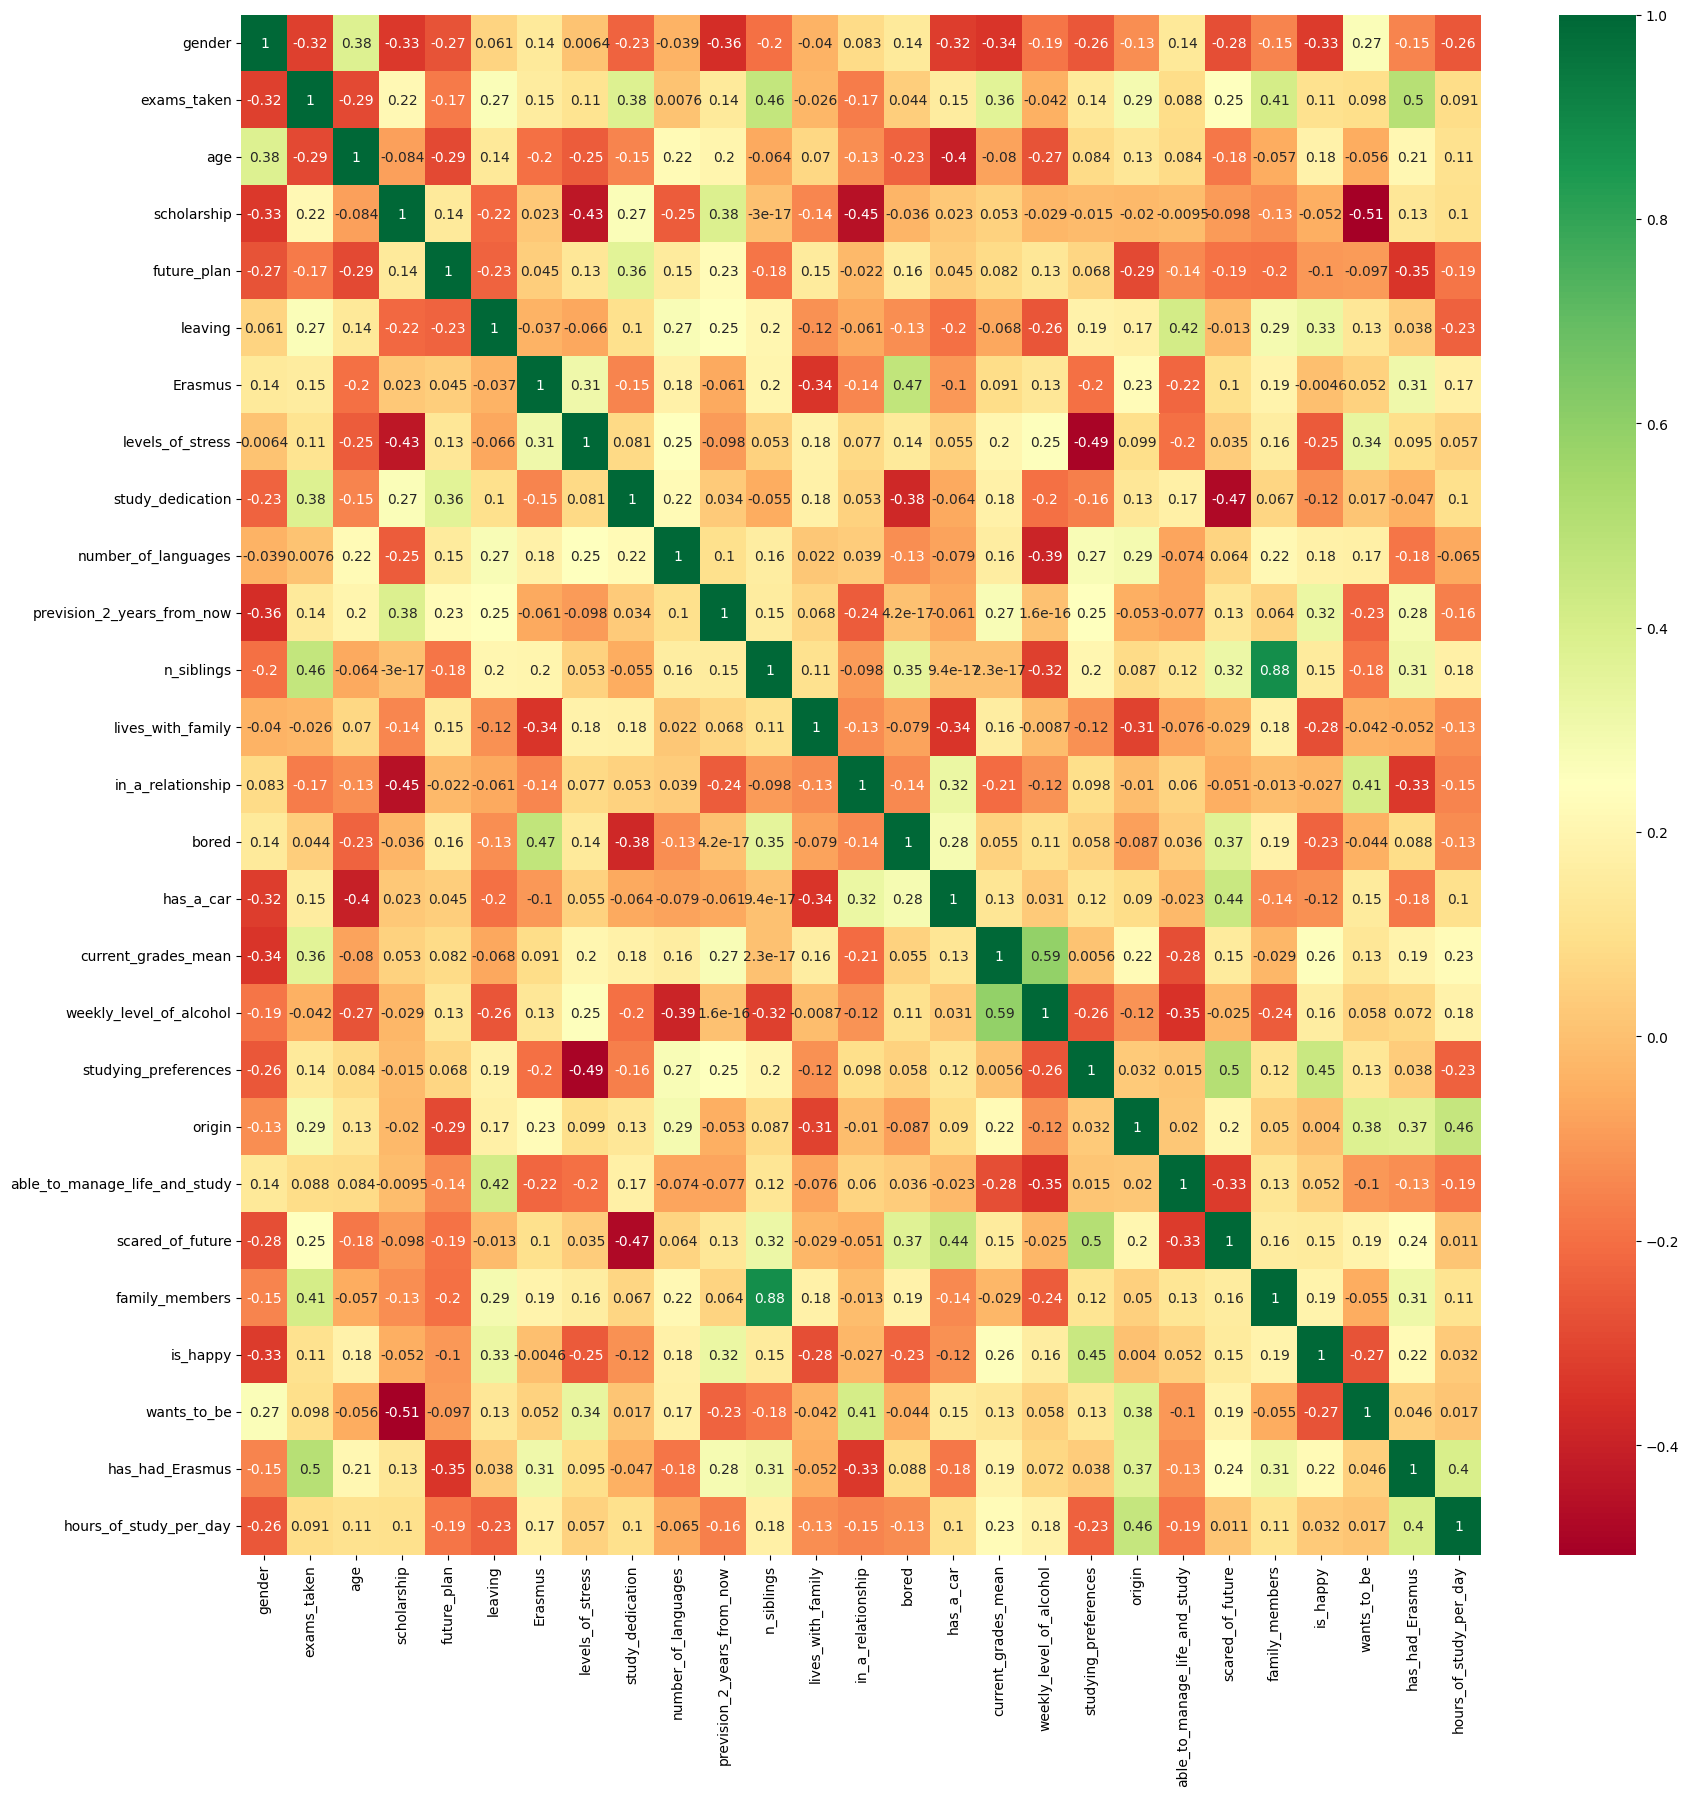

In [ ]:
#Correlation matrix
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Correlation with output variable
cor_target = abs(df1.corr()["Erasmus"])
#Selecting highly correlated features--> correlation higher than 20%
relevant_features = cor_target[cor_target>0.2]
relevant_features

age                              0.200277
Erasmus                          1.000000
levels_of_stress                 0.306827
lives_with_family                0.344273
bored                            0.469042
origin                           0.227246
able_to_manage_life_and_study    0.220324
has_had_Erasmus                  0.309277
Name: Erasmus, dtype: float64

In [ ]:
#Adding the current grades mean column (even if correlation <0.20) because logically and practically significant  
cols = [col for col in df1.columns if col in relevant_features]
df_s = df1[cols]
grades = df1["current_grades_mean"]
df_s = df_s.join(grades)
df_s

,age,Erasmus,levels_of_stress,lives_with_family,bored,origin,able_to_manage_life_and_study,has_had_Erasmus,current_grades_mean
0,23.0,1,2.0,0,1,0,1,0,26.0
1,22.0,1,4.0,0,1,1,1,1,27.0
2,23.0,0,2.0,0,0,1,1,0,24.0
3,22.0,1,5.0,1,0,1,1,0,27.0
4,22.0,1,5.0,1,1,1,1,0,29.0
5,21.0,0,4.0,1,0,0,0,0,30.0
6,23.0,1,3.0,0,0,1,0,0,28.5
7,21.0,1,3.0,1,1,0,1,0,27.0
8,25.0,1,4.0,1,0,1,1,1,29.5
9,23.0,1,3.0,1,0,1,0,1,29.0


In [ ]:
#Separating target and predictors
y_s = df_s['Erasmus'].values
x_s = df_s.drop(df_s.columns[[1]], axis=1)
scaler = StandardScaler()
scaler.fit(x_s)
x_s = scaler.transform(x_s)

In [ ]:
#Logistic regression feature selection
log_regr = LogisticRegression()
y_pred = cross_val_predict(log_regr, x_s, y_s, cv=5)
conf_mat = confusion_matrix(y_s, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the logistic regression is: {}".format(acc))
results.append(acc)

[[ 7  4]
 [ 4 11]]
Mean 5-Fold accuracy of the logistic regression is: 0.6923076923076923


In [ ]:
#Decision tree feature selection 
tree = DecisionTreeClassifier()
y_pred = cross_val_predict(tree, x_s, y_s, cv=5)
conf_mat = confusion_matrix(y_s, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the decision tree is: {}".format(acc))
results.append(acc)

[[ 7  4]
 [ 5 10]]
Mean 5-Fold accuracy of the decision tree is: 0.6538461538461539


In [ ]:
#Support vector machine feature selection 
svm = SVC(kernel='linear') 
y_pred = cross_val_predict(svm, x_s, y_s, cv=5)
conf_mat = confusion_matrix(y_s, y_pred)
print(conf_mat) 
acc=(conf_mat[0,0]+conf_mat[1,1])/(conf_mat[0,0]+conf_mat[1,1]+conf_mat[0,1]+conf_mat[1,0])
print("Mean 5-Fold accuracy of the support vector machine is: {}".format(acc))
results.append(acc)

[[7 4]
 [6 9]]
Mean 5-Fold accuracy of the support vector machine is: 0.6153846153846154


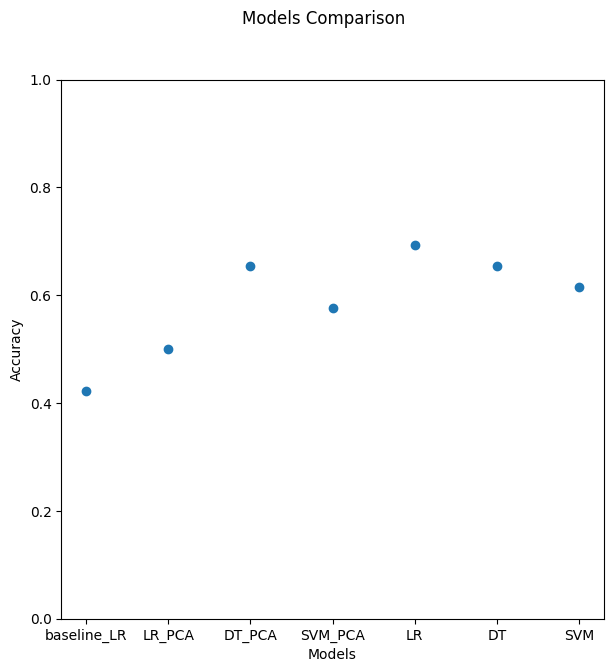

In [ ]:
#Final graph for the comparison of the results of the different models 
names=['baseline_LR','LR_PCA','DT_PCA','SVM_PCA','LR','DT','SVM']
fig = plt.figure(figsize=(7,7))
fig.suptitle('Models Comparison')
ax = fig.add_subplot(111)
plt.scatter(names,results)
plt.xlabel('Models')
plt.ylabel('Accuracy')
ax.set_xticklabels(names)
ax.set_ylim([0, 1])
plt.show()